In [1]:
# importing relevant libraries and downloading necessary packages
import pandas as pd
import numpy as np
! pip install kmodes
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
#! pip install gower 
#import gower
! pip install umap-learn
import umap
from sklearn.preprocessing import StandardScaler

     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 30.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=3c24045cd5c1d867ff7caa788587445cb3e61252507fb1ef395f6873d981e2f3
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=0b669aab259572cd4b9e210ead49a53556af1df49c5fbae39423608959de572d
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv('/content/drive/My Drive/CS 5112 Final Project/Code/latest data/okcupid-cleaned-dropped-10k-handlabels.csv')

Mounted at /content/drive


In [3]:
############################################################################################
# 
# Inputs
#
# cluster_labels --> a numpy array containing cluster labels for people
# in the order of the original file
#
# hand_label_info --> the dataframe version of 'okcupid-cleaned-dropped-10k-handlabels.csv'
#
# ==========================================================================================
# 
# Outputs (in order)
#
# sim_count --> the number of pairs (out of 50) which are correctly 
# assigned to the same cluster
# 
# dissim_count --> the number of pairs (out of 51) which are correctly
# assigned to different clusters
#
############################################################################################


def eval_performance(cluster_labels, hand_label_info):
    
    # add the row number to each row of the hand_label_info df
    hand_label_info['index'] = range(0, len(hand_label_info))
    
    # get all 202 rows that have labels
    labeled_rows = hand_label_info[~hand_label_info['hand-label'].isnull()]
    
    # get all 100 rows with similar pairs of people
    sim = labeled_rows[labeled_rows['hand-label'].str.isnumeric()]
    
    # get all 102 rows with dissimilar pairs of people
    dissim = labeled_rows[~labeled_rows['hand-label'].str.isnumeric()]
    
    # sort both so similar / dissimilar pairs are consecutive
    sim = sim.sort_values(by=['hand-label'])
    dissim = dissim.sort_values(by=['hand-label'])
    
    # count the number of similar people who ended up in the same cluster
    
    # loop through every pair of similar people
    
    i = 0
    sim_count = 0
    
    while i + 1 < len(sim):
        
        person1 = sim.iloc[i]
        person2 = sim.iloc[i+1]
        
        # get the (original) row number associated with each person
        index1 = person1['index']
        index2 = person2['index']
        
        # increment the count if the two people's cluster assignments are the same
        if cluster_labels[index1] == cluster_labels[index2]:
            sim_count += 1
        
        # move to the next pair
        i += 2
 
    
    # count the number of dissimilar people who ended up in different clusters
    
    # loop through every pair of dissimilar people
    
    j = 0
    dissim_count = 0
    
    while j + 1 < len(dissim):
        
        person1 = dissim.iloc[j]
        person2 = dissim.iloc[j+1]
        
        # get the (original) row number associated with each person
        index1 = person1['index']
        index2 = person2['index']
        
        # increment the count if the two people's cluster assignments are different
        if cluster_labels[index1] != cluster_labels[index2]:
            dissim_count += 1
        
        # move to the next pair
        j += 2
        
    # print the performance 
    print(str(sim_count) + " out of 50 or " + str(round((sim_count/50)*100, 2)) + "% of similar pairs were in the same cluster")
    print(str(dissim_count) + " out of 51 or " + str(round((dissim_count/51)*100, 2)) + "% of dissimilar pairs were in different clusters")
    
    return sim_count, dissim_count
    

In [4]:
df.drop(columns=['arabic', 'korean', 'turkish'], inplace=True)

In [5]:
df.drop(columns=['Unnamed: 0', 'hand-label'], inplace=True)

In [6]:
df.drop(df.tail(1).index,inplace=True)

In [7]:
df['age'].max()

69.0

In [8]:
# # 18

# def bin_age(x):


In [9]:
# df_kmodes = df.copy()
# df_kmodes['age'] = 

In [10]:
# scaler = StandardScaler()
# df[['age', 'height', 'drinks', 'body_type']] = scaler.fit_transform(df[['age', 'height', 'drinks', 'body_type']])

In [11]:
df_k = df.drop(columns=['sex', 'orientation'])

In [12]:
df_k.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,sign,smokes,chinese,english,german,hindi,italian,japanese,portuguese,russian,spanish,has kids,wants kids,likes dogs,likes cats,new_religion
0,26.0,5.0,vegan,2.0,sometimes,graduated from college/university,white,62.0,artistic / musical / writer,whatever,no,no,yes,no,no,no,no,no,no,yes,no,yes,yes,yes,agnosticism
1,38.0,5.0,anything,2.0,never,working on grad,white,69.0,science / tech / engineering,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,none
2,38.0,5.0,anything,3.0,never,graduated from college/university,white,68.0,science / tech / engineering,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,none
3,38.0,4.0,anything,0.0,never,graduated from college/university,asian,63.0,other,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,catholicism
4,24.0,4.0,anything,2.0,sometimes,graduated from high school,white,68.0,retired,does_not_matter,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,other


In [13]:
df_k.shape

(10000, 25)

In [14]:
# numerical = age, height
# ordinal = body_type, drinks
# categorical = all others
cat_index = [2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [15]:
dfMatrix = df_k.to_numpy()
dfMatrix.shape

(10000, 25)

In [16]:
# test k-proto
kproto = KPrototypes(n_clusters = 50, init = 'Huang', random_state = 0, verbose = 1, n_init=1, gamma=1)
kproto.fit_predict(dfMatrix, categorical = cat_index)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3484, ncost: 97434.00803836908
Run: 1, iteration: 2/100, moves: 1300, ncost: 94658.96493216662
Run: 1, iteration: 3/100, moves: 758, ncost: 93339.51108546421
Run: 1, iteration: 4/100, moves: 513, ncost: 

array([13, 14, 20, ..., 29, 29, 49], dtype=uint16)

In [17]:
df_k['k-proto-labels'] = kproto.labels_

In [18]:
df_k['k-proto-labels'].value_counts().std()

95.15980115102197

In [ ]:
df_k[df_k['k-proto-labels'] == 1]

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,sign,smokes,chinese,english,german,hindi,italian,japanese,portuguese,russian,spanish,has kids,wants kids,likes dogs,likes cats,new_religion,k-proto-labels
27,23.0,5.0,anything,2.0,never,graduated from college/university,white,70.0,sales / marketing / biz dev,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,none,1
45,24.0,4.0,anything,2.0,never,graduated from college/university,white,71.0,science / tech / engineering,whatever,sometimes,no,yes,no,no,no,no,no,no,no,no,no,no,no,none,1
55,25.0,4.0,anything,2.0,never,graduated from college/university,white,72.0,artistic / musical / writer,does_not_matter,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,agnosticism,1
75,22.0,5.0,anything,3.0,never,graduated from college/university,white,72.0,computer / hardware / software,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,judaism,1
78,24.0,2.0,anything,2.0,never,graduated from college/university,white,72.0,sales / marketing / biz dev,does_not_matter,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,catholicism,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,24.0,4.0,anything,2.0,never,graduated from college/university,white,73.0,computer / hardware / software,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,atheism,1
9913,24.0,4.0,anything,3.0,often,dropped out of high school,white,73.0,medicine / health,whatever,yes,no,yes,no,no,no,no,no,no,no,no,yes,yes,yes,other,1
9933,24.0,5.0,anything,2.0,never,graduated from college/university,white,71.0,computer / hardware / software,whatever,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,none,1
9934,25.0,5.0,anything,2.0,never,graduated from college/university,white,71.0,science / tech / engineering,does_not_matter,no,no,yes,no,no,no,no,no,no,no,no,no,yes,yes,agnosticism,1


In [ ]:
#Preprocessing numerical
#numerical = df_k.select_dtypes(exclude='object')
numerical = df_k.select_dtypes(include='float64')
#numerical = df_k[num]

##preprocessing categorical
categorical = df_k.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

In [ ]:
#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df_k.select_dtypes(include='object').columns) / df_k.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2', random_state=42).fit(numerical)
fit2 = umap.UMAP(metric='dice', random_state=42).fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random.RandomState(seed=42), fit1.metric, 
                                                fit1._metric_kwds, False, fit1._densmap_kwds, fit1.output_dens)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


In [ ]:
embedding[0]

array([[ 8.089926 ,  6.937999 ],
       [ 1.8837726,  1.5473497],
       [-4.0688615,  5.671182 ],
       ...,
       [ 6.0579715,  7.9029946],
       [ 2.4552236,  6.259082 ],
       [ 2.1293983,  1.2507068]], dtype=float32)

In [ ]:
embedding[0][:, 0]

array([ 8.089926 ,  1.8837726, -4.0688615, ...,  6.0579715,  2.4552236,
        2.1293983], dtype=float32)

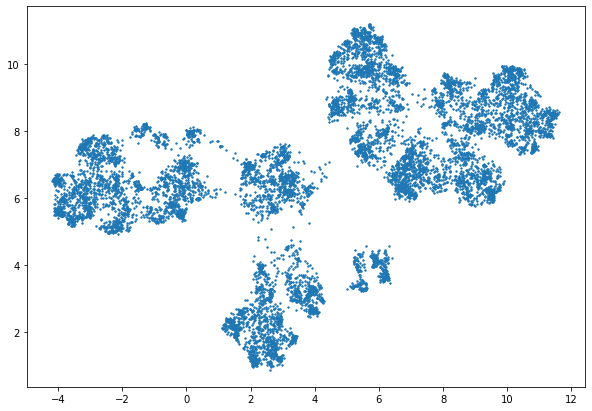

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(embedding[0][:, 0], embedding[0][:, 1], s=2, cmap='Spectral')
plt.show()

In [ ]:
# df_kmeans = pd.read_csv('/content/drive/My Drive/CS 5112 Final Project/Code/k_means_label.csv')

In [ ]:
# df_heir = pd.read_csv('/content/drive/My Drive/CS 5112 Final Project/Code/hier_label.csv')

In [ ]:
# df_k['k_means_label'] = df_kmeans['kmeans']

In [ ]:
# df_k['heir_label'] = df_heir['heirarchical']

In [ ]:
# plt.figure(figsize=(10, 7))
# plt.scatter(embedding[0][:, 0], embedding[0][:, 1], s=3, c=df_k['k_means_label'], cmap='hsv', alpha=0.5)
# plt.xlabel('Component 1', size=12)
# plt.ylabel('Component 2', size=12)
# plt.title('K-means cluster visualization (k = 8)', size=14, pad=10)
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 7))
# plt.scatter(embedding[0][:, 0], embedding[0][:, 1], s=3, c=df_k['heir_label'], cmap='hsv', alpha=0.5)
# plt.xlabel('Component 1', size=12)
# plt.ylabel('Component 2', size=12)
# plt.title('Heirarchical cluster visualization (k = 8)', size=14, pad=10)
# plt.show()

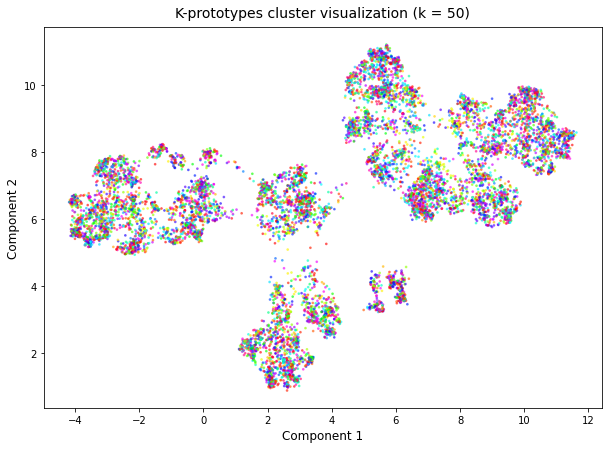

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(embedding[0][:, 0], embedding[0][:, 1], s=3, c=df_k['k-proto-labels'], cmap='hsv', alpha=0.5)
plt.xlabel('Component 1', size=12)
plt.ylabel('Component 2', size=12)
plt.title('K-prototypes cluster visualization (k = 50)', size=14, pad=10)
plt.show()

In [ ]:
df_k.to_csv('/content/drive/My Drive/CS 5112 Final Project/Code/Match_after_cluster/k-proto-labels-lang-drop.csv')

In [ ]:
#df_k['k proto labels'].value_counts

In [ ]:
# Calculate acc scores
k_proto_labels = df_k['k-proto-labels'].to_numpy()

hand_label_info = pd.read_csv('/content/drive/My Drive/CS 5112 Final Project/Code/latest data/okcupid-cleaned-dropped-10k-handlabels.csv')
display(hand_label_info)

eval_performance(k_proto_labels, hand_label_info)

,Unnamed: 0,age,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,job,sign,smokes,arabic,chinese,english,german,hindi,italian,japanese,korean,portuguese,russian,spanish,turkish,has kids,wants kids,likes dogs,likes cats,new_religion,hand-label
0,30518.0,26.0,f,straight,5.0,vegan,2.0,sometimes,graduated from college/university,white,62.0,artistic / musical / writer,whatever,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,yes,yes,yes,agnosticism,T
1,56256.0,38.0,f,straight,5.0,anything,2.0,never,working on grad,white,69.0,science / tech / engineering,whatever,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,none,NaN
2,31846.0,38.0,m,straight,5.0,anything,3.0,never,graduated from college/university,white,68.0,science / tech / engineering,whatever,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,none,NaN
3,38659.0,38.0,f,straight,4.0,anything,0.0,never,graduated from college/university,asian,63.0,other,whatever,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,catholicism,NaN
4,20309.0,24.0,f,gay,4.0,anything,2.0,sometimes,graduated from high school,white,68.0,retired,does_not_matter,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,32132.0,22.0,f,bisexual,5.0,vegetarian,2.0,sometimes,graduated from college/university,black,69.0,hospitality / travel,whatever,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,none,NaN
9997,8119.0,22.0,m,straight,5.0,anything,2.0,sometimes,working on college/university,white,72.0,law / legal services,does_not_matter,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,yes,agnosticism,NaN
9998,7887.0,20.0,f,straight,2.0,other,1.0,never,working on college/university,mixed,71.0,sales / marketing / biz dev,does_not_matter,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,yes,no,christianity,NaN
9999,13868.0,27.0,f,straight,2.0,anything,2.0,never,graduated from college/university,white,67.0,other,whatever,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,none,NaN


19 out of 50 or 38.0% of similar pairs were in the same cluster
51 out of 51 or 100.0% of dissimilar pairs were in different clusters


(19, 51)

In [ ]:
# Check cluster quality 

In [ ]:
try_cluster = [10, 20, 25, 40, 50, 100]
cost = []
for cluster in try_cluster:
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Cao', random_state = 0, n_init = 1, verbose = 1)
        kprototype.fit_predict(dfMatrix, categorical = cat_index)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 10
Cluster initiation: 20
Cluster initiation: 25
Cluster initiation: 40
Cluster initiation: 50


In [ ]:
cost

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(try_cluster, cost, c='blue')
plt.plot(try_cluster, cost, c='blue')
plt.ylabel('k-Prototypes Cost', size=12, labelpad=15)
plt.xlabel('Number of Clusters', size=12, labelpad=15)
plt.title('Elbow method plot to determine optimal number of clusters for k=Prototypes', size=14, pad = 25)